In [5]:
# https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d
# https://medium.com/analytics-vidhya/hyperparameter-tuning-in-linear-regression-e0e0f1f968a1
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#### models
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
# https://xgboost.readthedocs.io/en/stable/parameter.html

In [6]:
import pandas as pd
import numpy as np

In [7]:
# import os
# import matplotlib.pyplot as plt
# os.environ["PATH"] += os.pathsep + 'C://Users/usuario/Downloads/Graphviz/bin'

In [8]:
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import learning_curve
# def cross_validate_learning_rate(estimator, x_train, y_train, cv = 5, scoring = 'roc_auc', return_train_score = True):
#     results = cross_validate(estimator,
#                             x_train,
#                             y_train,
#                             cv = cv,
#                             scoring=scoring,
#                             return_train_score = return_train_score ) 
#     train_scores = results['train_score']
#     test_scores = results['test_score']
#     print("train_scores: {}".format(np.mean(train_scores)))
#     print("test_scores: {}".format(np.mean(test_scores)))

    # lc = learning_curve(estimator, 
    #                     x_train, 
    #                     y_train, 
    #                     cv=cv, 
    #                     scoring=scoring)
    # samples, train, test = lc[0],lc[1],lc[2]
    # plt.plot(samples, np.mean(train, axis=1))
    # plt.plot(samples, np.mean(test, axis=1))

In [9]:
# from sklearn.model_selection import GridSearchCV
# def grid_search_param(X, y,nfolds, param_grid, model_sklearn, scoring):
#     grid_search = GridSearchCV(model_sklearn, param_grid, cv=nfolds, return_train_score=True, scoring=scoring)
#     grid_search.fit(X, y)
#     return grid_search

In [10]:
y_train = pd.read_pickle('../data/preprocessed/y_train.pkl')
y_train.head()

,TARGET
ID,
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_01,0
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_02,0
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_03,0
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_04,0
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_05,0


In [11]:
train_probs_cb = pd.read_pickle('../data/preprocessed/catboost/train_probs.pkl')
train_probs_lg = pd.read_pickle('../data/preprocessed/lightgbm/train_probs.pkl')
train_probs_xg = pd.read_pickle('../data/preprocessed/xgboost/train_probs.pkl')

test_probs_cb = pd.read_pickle('../data/preprocessed/catboost/test_probs.pkl')
test_probs_lg = pd.read_pickle('../data/preprocessed/lightgbm/test_probs.pkl')
test_probs_xg = pd.read_pickle('../data/preprocessed/xgboost/test_probs.pkl')

In [12]:
train_probs_total = pd.concat([train_probs_cb, train_probs_lg, train_probs_xg], axis=1) # train_probs_xg
test_probs_total =  pd.concat([test_probs_cb, test_probs_lg, test_probs_xg], axis=1) # test_probs_xg
train_probs_total.head()

,probs_cb,probs_lg,probs_xg
ID,,,
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_01,0.198940,0.160008,0.322848
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_02,0.207973,0.160008,0.316255
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_03,0.201889,0.160008,0.330101
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_04,0.211323,0.160008,0.330494
1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1079f498d53d42ff438|0fedacb725c2c2128d2b42505880d91d238e616b926278c41caff6da4c622e51|f793de205ead5ac302c4a1627829dea41f176b1068b993a32373fc869918374b|SEMANA_05,0.210850,0.160008,0.322848


In [13]:
display(train_probs_total.corr(), test_probs_total.corr())

,probs_cb,probs_lg,probs_xg
probs_cb,1.000000,0.962771,0.935252
probs_lg,0.962771,1.000000,0.930789
probs_xg,0.935252,0.930789,1.000000


,probs_cb,probs_lg,probs_xg
probs_cb,1.000000,0.953806,0.919135
probs_lg,0.953806,1.000000,0.928522
probs_xg,0.919135,0.928522,1.000000


In [14]:
folds = []
demanda2 = pd.read_pickle('../data/preprocessed/demanda2.pkl')
train = demanda2[demanda2['TARGET']>=0].copy()
folds.append(list(train[(train['SEMANA_XX']>=1) & (train['SEMANA_XX']<=10)].index))
folds.append(list(train[(train['SEMANA_XX']>=11) & (train['SEMANA_XX']<=20)].index))
folds.append(list(train[(train['SEMANA_XX']>=21) & (train['SEMANA_XX']<=30)].index))
folds.append(list(train[(train['SEMANA_XX']>=31) & (train['SEMANA_XX']<=40)].index))
folds.append(list(train[(train['SEMANA_XX']>=41) & (train['SEMANA_XX']<=50)].index))
len(folds), len(folds[0])

(5, 471730)

In [15]:
train = train_probs_total.copy()
test = test_probs_total.copy()

In [16]:
from sklearn.metrics import mean_squared_error
from xgboost  import XGBRegressor
fi = []
test_probs = []
train_probs = []
for i, idx in enumerate(folds):
    print("*"*10, i, "*"*10)
    Xt = train.drop(idx)
    yt = y_train.loc[Xt.index].TARGET

    Xv = train.loc[idx]
    yv = y_train.loc[Xv.index].TARGET

    # learner = XGBRegressor(n_estimators=1000,  random_state=42, **param)
    learner = XGBRegressor(n_estimators=1000,  random_state=42, n_jobs=-1, max_depth=2, learning_rate=0.05, booster='gblinear') #gbtree | dart
    learner.fit(Xt, yt,  early_stopping_rounds=10, eval_metric="rmse",
                eval_set=[(Xt, yt), (Xv, yv)], verbose=10)
    
    test_probs.append(pd.Series(learner.predict(test), index=test.index, name="fold_" + str(i)))
    train_probs.append(pd.Series(learner.predict(Xv), index=Xv.index, name="probs"))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
test_probs = test_probs.apply(lambda x: 0 if x<0 else x)

train_probs = pd.concat(train_probs)
train_probs = train_probs.apply(lambda x: 0 if x<0 else x)

fi = pd.concat(fi, axis=1).mean(axis=1)
score = mean_squared_error(y_train.loc[train.index].TARGET, train_probs.loc[train.index], squared=False)
print('SCORE RMSE: ', score)

********** 0 **********
[05:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:5.19698	validation_1-rmse:6.58143


C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:3.65625	validation_1-rmse:4.77762
[20]	validation_0-rmse:3.55512	validation_1-rmse:4.60669
[30]	validation_0-rmse:3.54214	validation_1-rmse:4.57960
[40]	validation_0-rmse:3.53785	validation_1-rmse:4.57297
[50]	validation_0-rmse:3.53582	validation_1-rmse:4.57096
[60]	validation_0-rmse:3.53463	validation_1-rmse:4.57029
[70]	validation_0-rmse:3.53378	validation_1-rmse:4.57007
[80]	validation_0-rmse:3.53309	validation_1-rmse:4.57004
[87]	validation_0-rmse:3.53266	validation_1-rmse:4.57008
********** 1 **********
[05:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:5.60440	validation_1-rm

C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:4.00357	validation_1-rmse:3.37312
[20]	validation_0-rmse:3.90335	validation_1-rmse:3.26369
[30]	validation_0-rmse:3.89171	validation_1-rmse:3.24849
[40]	validation_0-rmse:3.88829	validation_1-rmse:3.24308
[50]	validation_0-rmse:3.88690	validation_1-rmse:3.24040
[60]	validation_0-rmse:3.88623	validation_1-rmse:3.23878
[70]	validation_0-rmse:3.88585	validation_1-rmse:3.23762
[80]	validation_0-rmse:3.88558	validation_1-rmse:3.23669
[90]	validation_0-rmse:3.88536	validation_1-rmse:3.23587
[100]	validation_0-rmse:3.88516	validation_1-rmse:3.23513
[110]	validation_0-rmse:3.88498	validation_1-rmse:3.23444
[120]	validation_0-rmse:3.88481	validation_1-rmse:3.23379
[130]	validation_0-rmse:3.88465	validation_1-rmse:3.23318
[140]	validation_0-rmse:3.88450	validation_1-rmse:3.23261
[150]	validation_0-rmse:3.88436	validation_1-rmse:3.23206
[160]	validation_0-rmse:3.88423	validation_1-rmse:3.23155
[170]	validation_0-rmse:3.88410	validation_1-rmse:3.23106
[180]	validation_0-rmse

C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:3.86279	validation_1-rmse:3.93861
[20]	validation_0-rmse:3.76552	validation_1-rmse:3.84183
[30]	validation_0-rmse:3.75336	validation_1-rmse:3.83621
[40]	validation_0-rmse:3.74946	validation_1-rmse:3.83454
[50]	validation_0-rmse:3.74770	validation_1-rmse:3.83374
[60]	validation_0-rmse:3.74672	validation_1-rmse:3.83340
[70]	validation_0-rmse:3.74605	validation_1-rmse:3.83326
[80]	validation_0-rmse:3.74553	validation_1-rmse:3.83321
[90]	validation_0-rmse:3.74507	validation_1-rmse:3.83321
[94]	validation_0-rmse:3.74490	validation_1-rmse:3.83322
********** 3 **********
[05:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:3.96047	validation_1-rmse:3.52119
[20]	validation_0-rmse:3.86018	validation_1-rmse:3.44168
[30]	validation_0-rmse:3.84742	validation_1-rmse:3.44232
[31]	validation_0-rmse:3.84682	validation_1-rmse:3.44243
********** 4 **********
[05:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:5.74854	validation_1-rmse:4.28517


C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\usuario\anaconda3\envs\venv_entel2022\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:3.93387	validation_1-rmse:3.67795
[20]	validation_0-rmse:3.81845	validation_1-rmse:3.64083
[30]	validation_0-rmse:3.80565	validation_1-rmse:3.63146
[40]	validation_0-rmse:3.80191	validation_1-rmse:3.62697
[50]	validation_0-rmse:3.80033	validation_1-rmse:3.62465
[60]	validation_0-rmse:3.79952	validation_1-rmse:3.62332
[70]	validation_0-rmse:3.79901	validation_1-rmse:3.62245
[80]	validation_0-rmse:3.79863	validation_1-rmse:3.62182
[90]	validation_0-rmse:3.79830	validation_1-rmse:3.62130
[100]	validation_0-rmse:3.79801	validation_1-rmse:3.62086
[110]	validation_0-rmse:3.79775	validation_1-rmse:3.62046
[120]	validation_0-rmse:3.79750	validation_1-rmse:3.62009
[130]	validation_0-rmse:3.79728	validation_1-rmse:3.61975
[140]	validation_0-rmse:3.79707	validation_1-rmse:3.61943
[150]	validation_0-rmse:3.79687	validation_1-rmse:3.61913
[160]	validation_0-rmse:3.79669	validation_1-rmse:3.61884
[170]	validation_0-rmse:3.79652	validation_1-rmse:3.61857
[180]	validation_0-rmse

In [16]:
%%time
estimator = XGBRegressor(n_estimators=1000,  random_state=42)
estimator.fit(train, y_train, eval_metric="rmse")

CPU times: total: 1h 16min 6s
Wall time: 10min 40s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [17]:
test_probs.name = 'Demanda'
test_submit = test_probs.reset_index()[['ID','Demanda']]
test_submit

,ID,Demanda
0,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.274969
1,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.257401
2,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.277894
3,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.274533
4,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.267995
...,...,...
471725,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.152874
471726,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.162315
471727,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.164700
471728,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.171941


In [18]:
test_submit['Demanda'].describe()

count    471730.000000
mean          0.660625
std           2.409454
min           0.069554
25%           0.169745
50%           0.255588
75%           0.507586
max         229.332809
Name: Demanda, dtype: float64

In [39]:
test_submit.to_csv('../results/test_stacking_xg_cb_lg.csv', index=False)

In [40]:
# !kaggle competitions submit datathon-entel-2022-reto2 -f ../results/test_stacking_xg_cb_lg.csv -m "test"

In [17]:
# from sklearn.metrics import mean_squared_error, make_scorer
# ftwo_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
# # def my_custom_loss_func(y_true, y_pred):
# #     sum_se = np.sum((y_true - y_pred)**2)
# #     sum_se = sum_se/len(y_true)
# #     score = np.sqrt(sum_se)
# #     return score
# # ftwo_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

In [18]:
# %%time
# # from sklearn.linear_model import  LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # from sklearn.linear_model import Lasso
# ### definir los parametros a tunear
# max_depth= [4]
# criterion = ['squared_error']# 'friedman_mse', 'absolute_error', 'poisson'
# param_grid = {'max_depth':max_depth,'criterion':criterion}
# ### encontrando los hiper_parámetros
# fitting=grid_search_param(train_probs_total, y_train.TARGET, 5,param_grid, DecisionTreeRegressor(random_state=42), scoring=ftwo_scorer)
# ### instanciar el estimador
# estimator = fitting.best_estimator_
# print(estimator)
# ### aplicar cross_validate y learning_rate 
# cross_validate_learning_rate(estimator, train_probs_total, y_train.TARGET, scoring=ftwo_scorer)

In [19]:
# import graphviz
# from sklearn.tree import export_graphviz
# treedot = export_graphviz(estimator,
#                           out_file = None,
#                           feature_names = train_probs_total.columns)

In [20]:
# graphviz.Source(treedot)

In [21]:
# %%time
# from sklearn.linear_model import  LinearRegression
# # from sklearn.tree import DecisionTreeRegressor
# # from sklearn.linear_model import Lasso
# ### definir los parametros a tunear
# positive = [True, False]
# fit_intercept = [True, False]
# param_grid = {'fit_intercept':fit_intercept, 'positive': positive}
# ### encontrando los hiper_parámetros
# fitting=grid_search_param(train_probs_total, y_train.TARGET, 5,param_grid, LinearRegression(n_jobs=-1), scoring=ftwo_scorer)
# ### instanciar el estimador
# estimator = fitting.best_estimator_
# print(estimator)
# ### aplicar cross_validate y learning_rate 
# cross_validate_learning_rate(estimator, train_probs_total, y_train.TARGET, scoring=ftwo_scorer)

In [22]:
# %%time
# # from sklearn.linear_model import  LinearRegression
# # from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Lasso
# ### definir los parametros a tunear
# alpha = np.linspace(0, 0.5, 10)
# param_grid = {'alpha':alpha}
# ### encontrando los hiper_parámetros
# fitting=grid_search_param(train_probs_total, y_train.TARGET, 5,param_grid, Lasso(random_state=42), scoring=ftwo_scorer)
# ### instanciar el estimador
# estimator = fitting.best_estimator_
# print(estimator)
# ### aplicar cross_validate y learning_rate 
# cross_validate_learning_rate(estimator, train_probs_total, y_train.TARGET, scoring=ftwo_scorer)

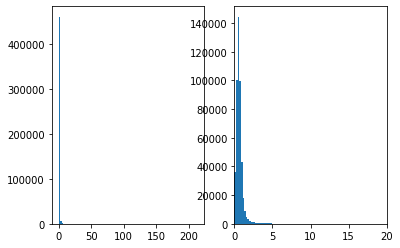

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(test_stacking, bins=100);
ax2.hist(test_stacking, bins=1000);
plt.xlim(0,20);

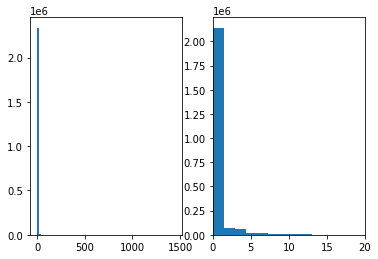

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train, bins=100);
ax2.hist(y_train, bins=1000);
plt.xlim(0,20);

In [27]:
test_stacking.name = 'Demanda'
test_submit = test_stacking.reset_index()[['ID','Demanda']]
test_submit

,ID,Demanda
0,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.406960
1,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.211076
2,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.295802
3,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.522945
4,1161c077d04c02902341ddd6f20f322d6fdaac2619ecf1...,0.463274
...,...,...
471725,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.495711
471726,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.520995
471727,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,1.445390
471728,ddf2b5328dafe4a5863dc2463578ea789284d951943120...,0.731866


In [28]:
test_submit['Demanda'].describe()

count    471730.000000
mean          0.715355
std           1.336952
min           0.000000
25%           0.395575
50%           0.569985
75%           0.776015
max         212.640854
Name: Demanda, dtype: float64

In [29]:
test_submit.to_csv('../results/test_stacking_xg_cb_lg_training_xg_cv.csv', index=False)

In [30]:
!kaggle competitions submit datathon-entel-2022-reto2 -f ../results/test_stacking_xg_cb_lg_training_xg_cv.csv -m "test"

Successfully submitted to DATATHON ENTEL 2022 - Reto2



  0%|          | 0.00/97.3M [00:00<?, ?B/s]
  0%|          | 8.00k/97.3M [00:00<36:17, 46.9kB/s]
  0%|          | 208k/97.3M [00:00<03:15, 520kB/s]  
  1%|          | 872k/97.3M [00:00<00:48, 2.08MB/s]
  1%|1         | 1.21M/97.3M [00:00<00:40, 2.47MB/s]
  2%|1         | 1.62M/97.3M [00:00<00:34, 2.89MB/s]
  2%|2         | 2.03M/97.3M [00:00<00:30, 3.26MB/s]
  2%|2         | 2.39M/97.3M [00:00<00:29, 3.36MB/s]
  3%|2         | 2.76M/97.3M [00:01<00:28, 3.49MB/s]
  3%|3         | 3.12M/97.3M [00:01<00:27, 3.55MB/s]
  4%|3         | 3.48M/97.3M [00:01<00:27, 3.61MB/s]
  4%|4         | 3.90M/97.3M [00:01<00:25, 3.82MB/s]
  5%|4         | 4.76M/97.3M [00:01<00:18, 5.27MB/s]
  5%|5         | 5.27M/97.3M [00:01<00:22, 4.37MB/s]
  6%|5         | 5.72M/97.3M [00:01<00:22, 4.21MB/s]
  6%|6         | 6.14M/97.3M [00:01<00:25, 3.72MB/s]
  7%|6         | 6.54M/97.3M [00:02<00:26, 3.65MB/s]
  7%|7         | 6.91M/97.3M [00:02<00:25, 3.72MB/s]
  7%|7         | 7.28M/97.3M [00:02<00:25, 3.74MB/s]
  